# DIABETES PREDICTION USING VARIOUS CLASSIFIERS

In this project, we deal with the problem of classifying whether a person is suffering from diabetes or not.
I used this https://www.kaggle.com/uciml/pima-indians-diabetes-database to get my required dataset.
This dataset includes people with various features like BMI,glucose levels and ages to consider as a primary factor for classifying if a person is postive or not.
Here outcome of 1 corresponds to positive test and outcome of 0 corresponds to negative test

# Importing all the necessary libraries and datasets

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my = pd.read_csv('diabetes.csv')

In [3]:
my.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
my.shape

(768, 9)

# plotting the outcomes based on features like glucose,Insulin,BMI

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


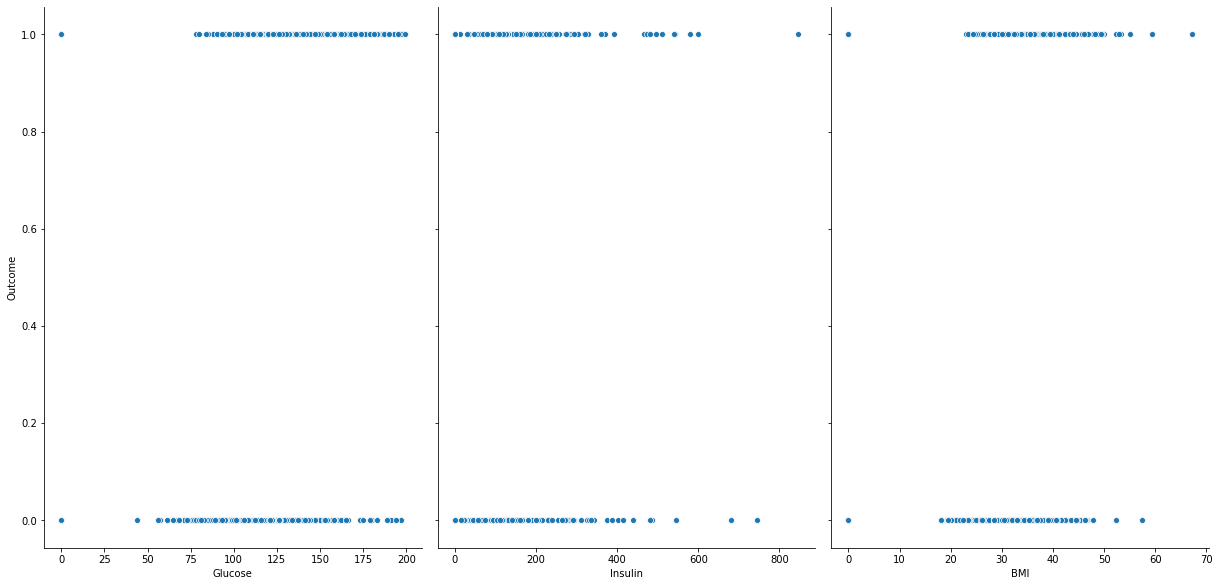

In [5]:
import seaborn as sns
sns.pairplot(my, x_vars=['Glucose','Insulin','BMI'], y_vars='Outcome', size=8, aspect=0.7)

In [6]:
properties=list(my.columns.values)

In [7]:
properties.remove('Outcome')

In [8]:
properties

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
X=my[properties]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y=my['Outcome']

In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the dataset into testing , training sets and validation sets in the ratio 1:1:5

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train,X_validation,y_train,y_validation=train_test_split(X_train, y_train,test_size=0.2, random_state=0)

# Using linear regression model and training the model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model=LinearRegression().fit(X_train,y_train)

# evaluating the r^2 score for the given model on the dataset

In [15]:
model.score(X_validation,y_validation)

0.29832047599397804

In [16]:
y_pred=model.predict(X_validation)
y_pred

array([ 0.36693293,  0.2956387 ,  0.11475428, -0.04240397,  0.1325568 ,
        0.47950133, -0.02244733,  0.35653462,  0.59932741,  0.39448625,
        0.72972041,  0.24449583,  0.28295754,  0.01304221,  0.38794741,
        0.50196225,  0.29981581,  0.71678379,  0.52647605,  0.32782239,
        0.22008888,  0.25142059,  0.2259923 ,  0.33487505,  0.39620999,
        0.84130943,  0.53511562,  0.25277943,  0.47084937,  0.02299225,
        0.34570574,  0.59419299,  0.06147282,  0.30355245,  0.37352037,
        0.3476955 ,  0.19494791,  0.64097203,  0.31288265,  0.11099014,
        0.73103244,  0.57029632,  0.3253301 ,  0.40510424,  0.49773213,
        0.27956545,  0.60930095,  0.16831452,  0.17260357,  0.92647784,
        0.34910194,  0.66669714,  0.77457837,  0.50428788,  0.37811383,
        0.45683655,  0.26876391,  0.36652602, -0.14417436,  0.66536949,
       -0.12669473,  0.50385665,  0.39922229,  0.291795  ,  0.65285037,
        0.1708934 , -0.11039797,  0.91908488,  0.42868368,  0.14

In [17]:
import numpy as np
MSE = np.square(np.subtract(y_validation,y_pred)).mean() 
MSE

0.16427714151823183

In [18]:
correct=y_pred==y_validation
correct

464    False
77     False
729    False
607    False
465    False
       ...  
116    False
146    False
767    False
248    False
685    False
Name: Outcome, Length: 123, dtype: bool

## The below two parameters denote the values of parameters and the bias used respectively

In [19]:
model.intercept_

-0.8289912068235297

In [20]:
model.coef_

array([ 0.01983259,  0.00531072, -0.00249413, -0.00034881, -0.00018398,
        0.01509089,  0.1598639 ,  0.00310965])

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


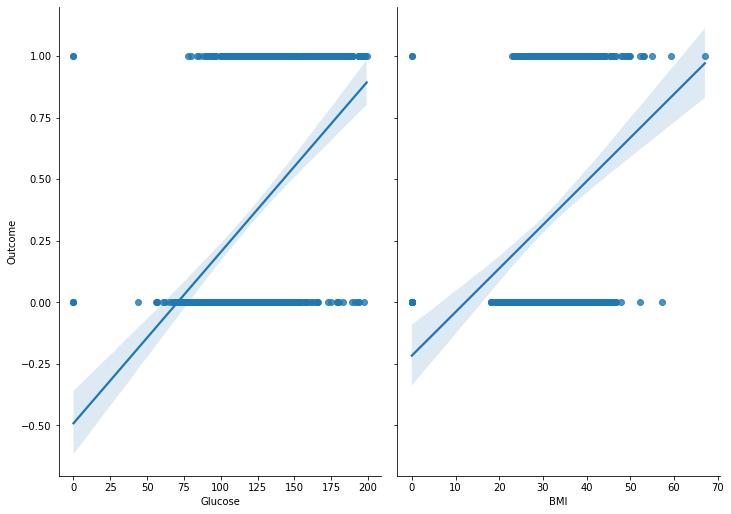

In [21]:
sns.pairplot(my, x_vars=['Glucose','BMI'], y_vars='Outcome', size=7, aspect=0.7, kind='reg')

# Using k-NeighborsClassifier model to classify data

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
knn.score(X_validation,y_validation)

0.7235772357723578

In [24]:
y1_predict=knn.predict(X_validation)
MSE=np.square(np.subtract(y1_predict,y_validation)).mean()
MSE

0.2764227642276423

In [25]:
correct1=y1_predict==y_validation
accuracy=sum(correct1)/len(correct1)
accuracy

0.7235772357723578

# Using Support Vector Machines(SVM'S) to predict

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
clf.score(X_validation,y_validation)

0.7398373983739838

In [28]:
y_pred2 = clf.predict(X_validation)

In [29]:
MSE=np.square(np.subtract(y_pred2,y_validation)).mean()
MSE

0.2601626016260163

In [30]:
correct2=y_pred2==y_validation
accuracy=sum(correct2)/len(correct2)
accuracy

0.7398373983739838

# A dataframe denoting the predicted value and the actual values from the given dataset

In [31]:
df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred2})

In [32]:
df

,Actual,Predicted
464,0,0
77,0,0
729,0,0
607,0,0
465,0,0
...,...,...
116,1,0
146,0,0
767,0,0
248,0,0


In [33]:
df1=df.head(50)

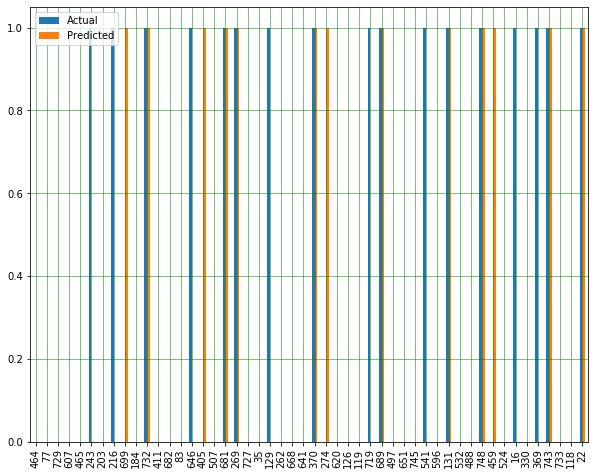

In [34]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Using Ridge classifier and Logistic regression classifier

In [35]:
from sklearn.linear_model import RidgeClassifier
rid= RidgeClassifier().fit(X_train, y_train)

In [36]:
rid.score(X_validation,y_validation)

0.7560975609756098

In [37]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

In [38]:
log.score(X_validation,y_validation)

0.7479674796747967

### From all the models used so far and the accuracy provided, we find that the Ridge classifier having accuracy of 75.6097% on the validation data is the model that fits the best both on training and validation set . A conclusion drawn from this would be that the linear classifier performs the worst and the ridge classifier performs the best which is the model which can be optimized further

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
grid.best_estimator_.alpha

1.0

we find out that the parameter alpha which works best for the given dataset is 1.0

Therefore,now lets use this ridge regression model on the final test dataset and estimate the accuracy of model for unseen data

In [40]:
from sklearn.linear_model import RidgeClassifier
ridt= RidgeClassifier(alpha=1.0).fit(X_train, y_train)
ridt.score(X_test,y_test)

0.8311688311688312

# REGRESSION

 In this problem ,we will find out the salary to be paid for an employee in a company based on his years of experience in the field of work.I have used the dataset https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset  to work on in this given problem

In [41]:
my1=pd.read_csv("Salary_Data.csv")

## Extarcting data from the dataset

In [42]:
my1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [43]:
X1 = my1.iloc[:, :-1].values 
y1= my1.iloc[:, 1].values 

In [44]:
X1

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [45]:
y1

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Using the Logistic Regressor model to find out the exact label for the given feature

In [46]:
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression().fit(X_train1,y_train1)

In [48]:
regressor.score(X_validation1,y_validation1)

0.9640813158559012

we find out that the accuracy is 98.881% on the validation data which is good!!!

In [49]:
y1_predict=regressor.predict(X_validation1)
MSE=np.square(np.subtract(y1_predict,y_validation1)).mean()
MSE

31041597.100090753

In [50]:
df3= pd.DataFrame({'Actual': y_validation1, 'Predicted': y1_predict})

In [51]:
df3

,Actual,Predicted
0,121872.0,127192.879499
1,46205.0,36809.051047
2,67938.0,72176.636093
3,81363.0,82000.965273
4,39343.0,34844.185211


In [52]:
regressor.predict([[5]])

array([73159.06901132])

So using the regression model,we can find out that for example, for an employee with a work experience of 5 years must be paid 73342 dollars according to the estimate above

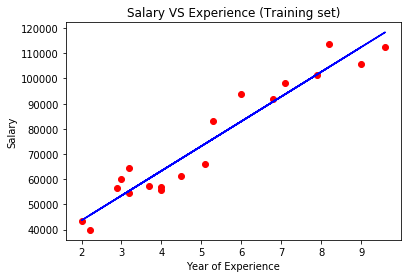

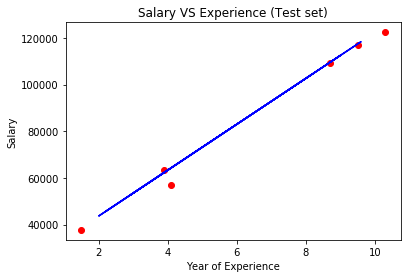

In [53]:
viz_train = plt
viz_train.scatter(X_train1, y_train1, color='red')
viz_train.plot(X_train1, regressor.predict(X_train1), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()


viz_test = plt
viz_test.scatter(X_test1, y_test1, color='red')
viz_test.plot(X_train1, regressor.predict(X_train1), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

We finally see how the training and test set data are fitted by the model